### Lasso Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn.datasets
import sklearn.cross_validation as cv
from sklearn import linear_model

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = sklearn.datasets.fetch_california_housing()
X = dataset['data']
y = dataset['target']

In [3]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=0)


In [4]:
alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)

0.0001 [  4.38725041e-01   9.60573216e-03  -1.02607317e-01   6.13113796e-01
  -7.60040055e-06  -4.48887838e-03  -4.17236219e-01  -4.30443252e-01]
0.000215443469003 [  4.38302495e-01   9.61391144e-03  -1.01794733e-01   6.08938831e-01
  -7.56305472e-06  -4.48945068e-03  -4.17101115e-01  -4.30245638e-01]
0.000464158883361 [  4.37392131e-01   9.63153273e-03  -1.00044046e-01   5.99944032e-01
  -7.48259718e-06  -4.49068359e-03  -4.16810078e-01  -4.29819929e-01]
0.001 [  4.35430588e-01   9.66949146e-03  -9.62719961e-02   5.80564052e-01
  -7.30927570e-06  -4.49333892e-03  -4.16183481e-01  -4.28903173e-01]
0.00215443469003 [  4.31204047e-01   9.75125876e-03  -8.81446225e-02   5.38808130e-01
  -6.93591112e-06  -4.49905750e-03  -4.14834520e-01  -4.26929052e-01]
0.00464158883361 [  4.22097249e-01   9.92739780e-03  -7.06333349e-02   4.48842020e-01
  -6.13160704e-06  -4.51137374e-03  -4.11930165e-01  -4.22677769e-01]
0.01 [  4.02474124e-01   1.03068044e-02  -3.29020231e-02   2.54997948e-01
  -4.3990

In [5]:
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

CV [  3.81485543e-01   1.12872676e-02   2.20440782e-03   0.00000000e+00
   1.88778147e-06  -3.51349405e-03  -3.39002345e-01  -3.39456784e-01]


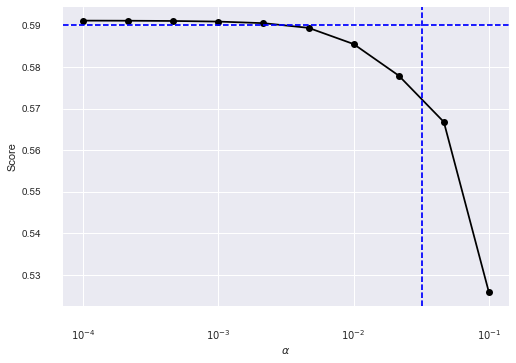

In [6]:
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

plt.show()